## Analysing MNIST Dataset to Identify Handwritten Digits
Often known as `Hello World` in the world of Machine Learning.

In [6]:
# load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False) 
# this fetch_* function from sklearn will download the real life datasets
# whereas the load_* methods contain toy datasets which come bundled with sklearn datasets package



In [3]:
# the datasets returned from this method are Bunch objects as Dict and its atrrs can be accessed
# with dot notation 
type(mnist)

sklearn.utils._bunch.Bunch

In [7]:
X, y = mnist.data, mnist.target

print(dir(mnist))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [ ]:
X.shape 

(70000, 784)

We have 70000 images with 784 features which are nothing but the pixels containing the pixel intensity from **0 (white)** to **255 (black)**

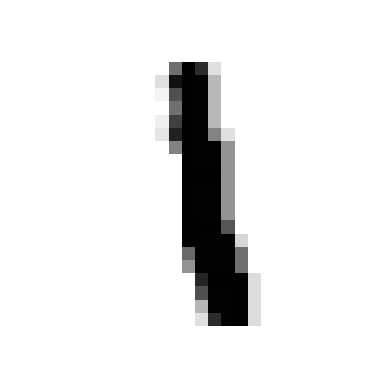

Actual image label 1


In [5]:
# Lets plot one of the images from the dataset to get a feel of the data
import matplotlib.pyplot as plt

def plot_digit_image(image_data):
    # we convert the 784 features into a 28x28 matrix
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[6]
plot_digit_image(some_digit)
plt.show()
print("Actual image label", y[6])

In [9]:
## Setting aside training and test dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

To beign with we convert this problem into a simple **binary classification** problem where we only try to predict if a digit is 5 or not, so its a case of binary classification.

We use **Stochastic Gradient Descent (SGD)** and train this model on our training dataset.

In [10]:
# before we proceed with this binary classification, 
# we need to create a target vector with binary result for 5

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# basically it is a numpy array so we can directly compare and get the desired boolean target vector



In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

# we train the model with full training dataset and the newly created target vector for digit 5
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

NOTE - it took around 13-21 seconds to train the model locally.

In [13]:
# After training its time to predict
digit = X[7]
prediction = sgd_clf.predict([digit])
true_value = y[7]

print("Predicted value: ", prediction)
print("True label: ", true_value)

Predicted value:  [False]
True label:  3


### Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") # 3 folds

array([0.95035, 0.96035, 0.9604 ])

95% avegrage accuracy looks impressive, but this is not the truth! We need to examine it further.

In [18]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()

dummy_clf.fit(X_train, y_train_5)

print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3,
                scoring="accuracy")  # 3 folds

array([0.90965, 0.90965, 0.90965])

Any dummy classifier is also giving 90% accuracy; this is true because our datset has mostly false labels i.e. digits are other than 5. True labels are quite less in number so the accuracy is obviously coming high. This is also the case of a skewed dataset; there is already a biasness towards a particular target.

This tells us that accuracy is not a good indicator to evaluate such classification models. We need some other techniques like ***confusion matrix***

#### Confusion Matrix

In [20]:
from sklearn.model_selection import cross_val_predict

#REVIEW: this method will train the data and then predict? 
# Won;t it be costly if the data is huge and we have already trained the model on same data
# but since its cross validation, so makes sense. But still, performance and computing issue? Check it out!!!

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # k = 3 folds
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [22]:
from sklearn.metrics import precision_score, recall_score

p_score = precision_score(y_train_5, y_train_pred)

r_score = recall_score(y_train_5, y_train_pred)

print("Precision Score: ", p_score)
print("Recall Score: ", r_score)

Precision Score:  0.8370879772350012
Recall Score:  0.6511713705958311


This conveys that when our model classifies an image as `5` it is correct `83%` of the time.
Also, it is only able to classify 5 correctly from the true 5s only `65%` of the times.

Precision score is good, but recall score is concerning. So we need a better score to combine both. This score is **F-1 Score**


In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

#TODO: revisit recall and precision